In [1]:
import sys
repo_dir = '/home/labs/amit/noamsh/repos/MM_2023'
sys.path.append(repo_dir)

%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path
from functools import partial

import pandas as pd
import numpy as np
from scipy.stats import skew, ttest_1samp, skewtest
from sklearn.decomposition import NMF, PCA

import matplotlib.pyplot as plt
import seaborn as sns

from data_loading.utils import load_dataframe_from_file

In [3]:
zstat_path = Path("/home/labs/amit/shuangyi/Project_MM3/Atlas/scvi_diff/zstat_Atlas_20240519_full.txt")
zstat_df = load_dataframe_from_file(zstat_path).rename(columns={'Unnamed: 0':"gene_name"}).set_index("gene_name").T
zstat_df

gene_name,CD74,BLOC1S5-TXNDC5,EDNRB,SEL1L3,CST3,XBP1,TPT1,HLA-B,CD79A,FKBP11,...,ZNF346-IT1,ZNF365,ZNF471,ZNF556,ZNF571-AS1,ZNF704,ZNF723,ZNF831,ZNF850,ZNF90P3
z.MARS_Malignant_01-001,-8.832457,-6.781061,6.658195,-5.616929,5.569297,-5.404347,-5.022597,-4.675577,-4.581012,-4.488908,...,0.0000,0.0,0.0000,0.0000,0.000000,0.0000,0.0000,0.0000,0.0000,0.0
z.MARS_Malignant_01-004,-9.592993,-2.863011,4.500575,-5.340406,-2.515391,-4.863290,-6.309165,-10.213435,-4.602243,-6.213567,...,-0.0099,0.0,0.1089,0.0792,0.000000,0.0000,0.0000,-0.0099,-0.0495,0.0
z.MARS_Malignant_01-005,-1.815924,-3.523979,7.279021,-1.413767,1.612862,-9.432155,-1.171040,-1.594610,-1.568619,-5.086227,...,-0.0297,0.0,-0.0198,0.0495,-0.009900,0.0693,0.0000,-0.0198,-0.0297,0.0
z.MARS_Malignant_01-006,-8.653704,-5.558967,0.201282,-4.610485,-0.200576,-4.093187,-5.290794,-3.100365,-3.812972,-2.288579,...,0.0990,0.0,0.0000,-0.0099,-0.009900,0.0000,0.0000,0.0000,0.0000,0.0
z.MARS_Malignant_01-007,-7.903569,-9.045166,-0.353427,-5.787569,1.339999,-7.271662,-4.222428,-9.046349,-4.680699,-2.800987,...,-0.0198,0.0,0.0000,0.0000,-0.039600,0.0000,0.0000,-0.0198,-0.0198,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
z.SPID_Malignant_Trans_RMC002,-7.811062,-2.564384,-0.132302,-3.029637,0.484009,-3.623256,-2.311960,4.468396,-2.744615,-6.581325,...,-0.0297,0.0,0.0000,-0.0693,-0.053707,-0.0198,-0.0495,0.0000,-0.0198,0.0
z.SPID_Malignant_Trans_RMC013,-4.082233,-1.556790,-0.648358,-3.391800,0.780027,-4.285474,-1.919454,2.403295,-3.066274,-5.193151,...,-0.0396,0.0,0.0000,-0.0297,0.089100,0.0000,-0.0594,0.0000,-0.0396,0.0
z.SPID_Malignant_Trans_TLV003,-7.249238,0.907981,7.428174,-4.191256,4.567583,-5.257747,-0.677734,3.864325,-3.244134,0.717163,...,0.1584,0.0,0.0000,-0.0495,-0.039600,-0.0198,-0.0198,-0.0099,-0.0198,0.0
z.SPID_Malignant_Trans_TLV005,-0.900051,-0.509544,1.359323,-1.279388,1.323141,-2.038648,0.448201,2.579755,-1.531632,-0.701970,...,-0.0297,0.0,0.0000,-0.0495,-0.039600,-0.0099,-0.0297,0.0000,-0.0495,0.0


## marker genes

In [4]:
marker_genes = ["CD38", "TXNIP", "FCRL5", "SSR4", "SDC1", "TNFRSF17", "DERL3", "MZB1", "CCND1", "FRZB", "LAMP5", "NSD2", "FGFR3", "ITGB7", "CDR1", "SPP1", "PPIA", "GPRC5D", "CCND2"]

In [5]:
mor_markers_df = load_dataframe_from_file(Path("/home/labs/amit/noamsh/data/mm_2023/MM targets and genes.xlsx"))
mor_markers_df.drop(columns=["Unnamed: 0"])
PC_markers = mor_markers_df['Known PC markers'].dropna().tolist()
MM_drivers = mor_markers_df['Known MM drivers'].dropna().tolist()
MM_drivers.remove("ITF4")
MM_drivers.append("IRF4")
MM_targets = mor_markers_df['MM targets'].dropna().tolist()
Clinical_trials = mor_markers_df['Clinical trials'].dropna().tolist()
Clinical_trials.remove('CD73')
Clinical_trials.append("NT5E")
Clinical_trials.remove('eIF2a')
Clinical_trials.append("EIF2A")

In [6]:
all_mor_markers = PC_markers + MM_drivers + MM_targets + Clinical_trials
# len(set(marker_genes).intersection(set(PC_markers))) , len(marker_genes)

In [7]:
genes = MM_targets
pd.concat([
            zstat_df[genes].apply(np.mean).rename("mean"),
            zstat_df[genes].apply(lambda gene_values: ttest_1samp(gene_values, popmean=0).pvalue).rename("ttest"),
            zstat_df[genes].apply(np.std).rename("std"),
            zstat_df[genes].apply(skew).rename("skew"),
            zstat_df[genes].apply(lambda gene_values: skewtest(gene_values).pvalue).rename("skwetest"), 
           ]
          , axis=1)


,mean,ttest,std,skew,skwetest
gene_name,,,,,
TNFRSF17,0.110955,3.844135e-01,1.726248,0.290643,0.100218
GPRC5D,0.553191,5.499055e-06,1.602694,0.469544,0.009699
XPO1,0.098131,2.145598e-02,0.573836,0.051713,0.765987
IKZF3,-0.681934,1.785831e-20,0.881912,0.380126,0.033654
IKZF1,-0.362468,8.590842e-11,0.713620,0.187852,0.283054
CRBN,0.072884,8.992706e-02,0.579934,0.377512,0.034823
SLAMF7,-1.348961,1.125836e-16,2.001297,-0.058484,0.736461
PSMA1,0.155407,5.368914e-03,0.748200,-0.090741,0.601944


<Axes: >

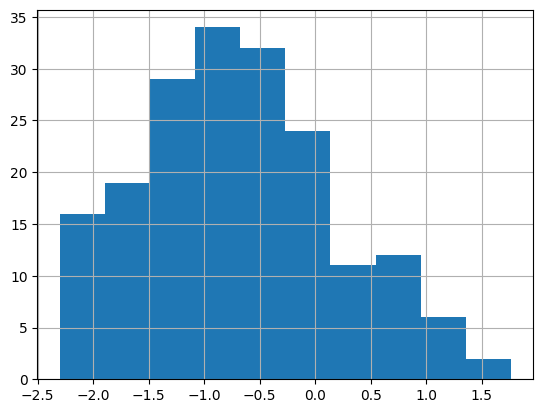

In [8]:
zstat_df["IKZF3"].hist() # skewed MM target

## target decomposition

<Axes: >

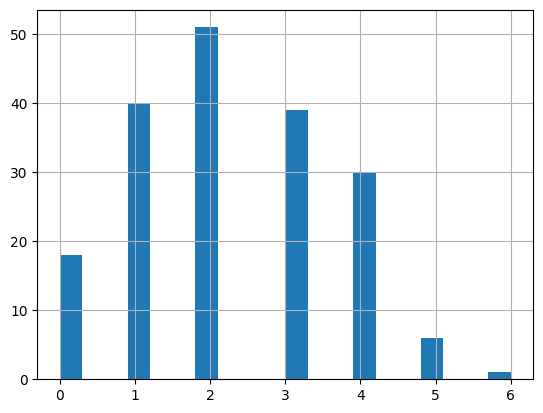

In [9]:
targets = MM_targets # + PC_markers + MM_drivers # + Clinical_trials + PC_markers + MM_drivers
mean = zstat_df[targets].mean()
std = zstat_df[targets].std()
zstat_df_is_high = zstat_df[targets] - mean - 0.5*std > 0
# zstat_df_is_high = zstat_df[targets] > 1.5
zstat_df_is_high.sum(axis=1).hist(bins=20)

/home/labs/amit/noamsh/.conda/envs/CLL_2024/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1710: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


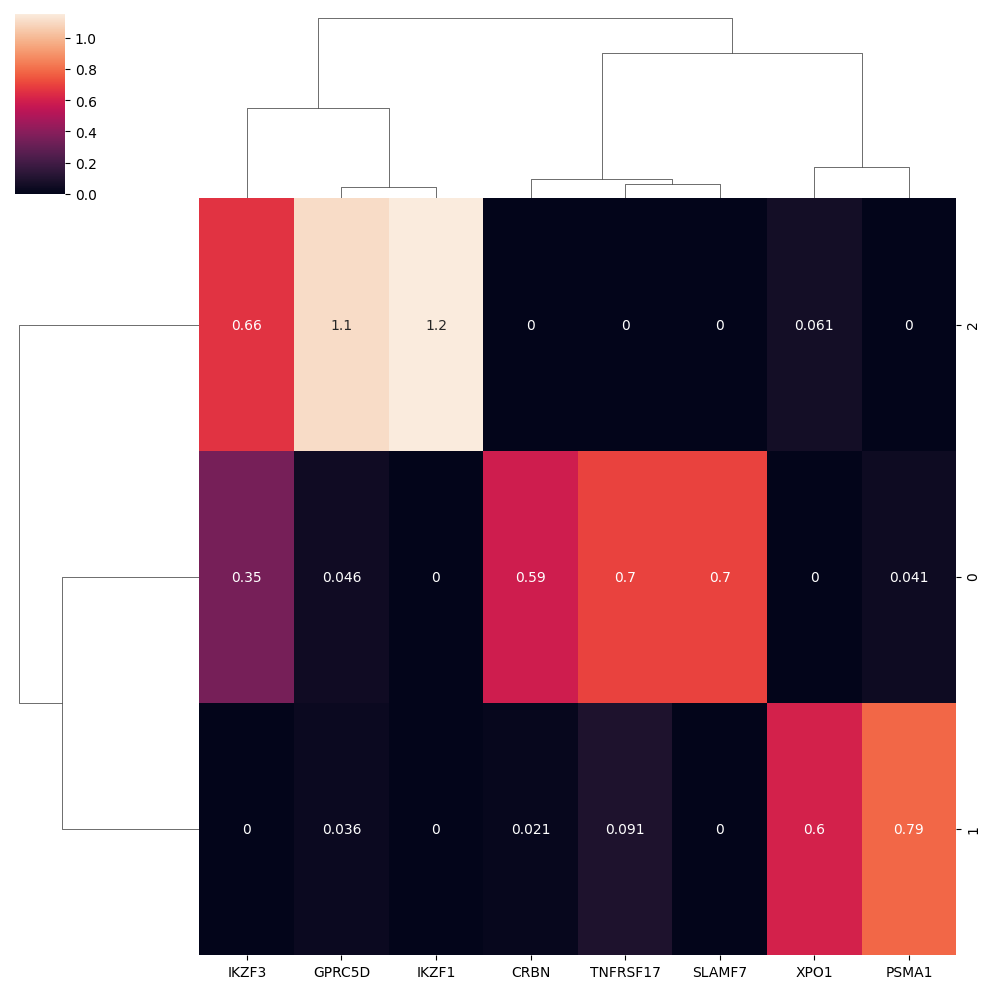

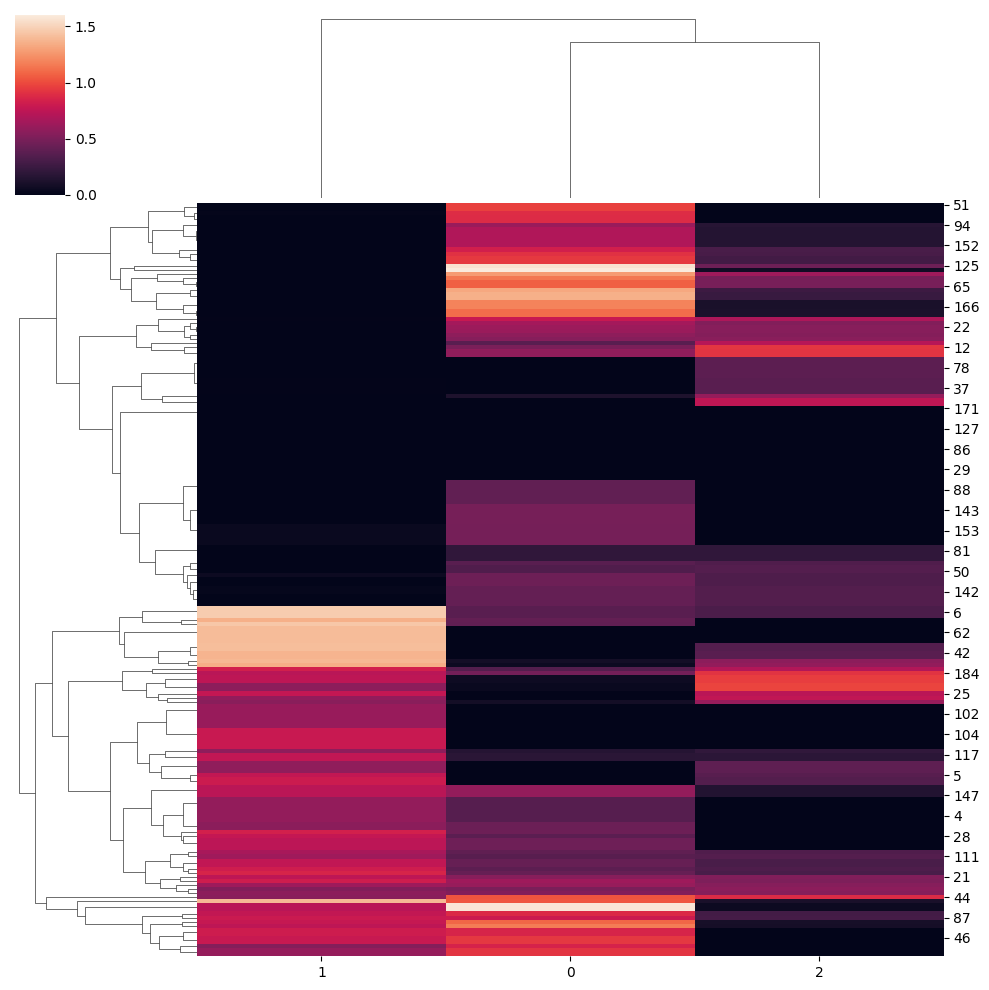

In [10]:
model = NMF(n_components=3, init='random', random_state=0)
W = model.fit_transform(zstat_df_is_high)
sns.clustermap(pd.DataFrame(model.components_, columns=targets), annot=True)
sns.clustermap(pd.DataFrame(W))

In [11]:
patients_low_targets = zstat_df[zstat_df_is_high.sum(axis=1) <= 1]
proportion_patients_with_gene = (patients_low_targets - patients_low_targets.mean() > 2.5).mean().sort_values(ascending=False)
proportion_patients_with_gene.head(20)

gene_name
CCND1             0.344828
B2M               0.327586
SSR4              0.258621
LINC01781         0.258621
FRZB              0.258621
LAMP5             0.241379
HLA-B             0.241379
MZB1              0.224138
RACK1             0.224138
LAPTM5            0.224138
BLOC1S5-TXNDC5    0.224138
HLA-A             0.224138
UBA52             0.206897
CD74              0.206897
TPT1              0.206897
ITM2B             0.189655
TIMP1             0.189655
CST3              0.189655
FAM30A            0.172414
EDNRB             0.172414
dtype: float64

In [12]:
[p_id.split("_")[-1] for p_id in patients_low_targets.index]

['01-001',
 '01-004',
 '01-011',
 '028-0603-001',
 '028-0606-001',
 '028-0608-008',
 '04-002',
 '04-003',
 '04-005',
 '05-002',
 '08-001',
 '09-001',
 '09-002',
 '10-005',
 '11-003',
 '11-005',
 'ASF1',
 'BEL04',
 'P19',
 'P20',
 'CSA-01-02',
 'CSA-01-04',
 'HMC05',
 'HMC06',
 'HMC10',
 'HMC11',
 'HMC18',
 'HMC20',
 'KydarNDMM01',
 'KydarNDMM03',
 'TLV01',
 'TLV12',
 'TLV13',
 'TLV18',
 'TLV19',
 'TLV25',
 'TLV27',
 'TLV34',
 'TLV48',
 'TLV51',
 'P03',
 'P16',
 'P35',
 'P45',
 'P46',
 'P48',
 'P54',
 'P103',
 'P225',
 'P258',
 'P309',
 'P659',
 'P683',
 'P792',
 'P85',
 'TLV53',
 'TLV77',
 'TLV85']

In [13]:
patients_no_targets = zstat_df[zstat_df_is_high.sum(axis=1) == 0]
proportion_patients_with_gene = (patients_no_targets - patients_no_targets.mean() > 2.5).mean().sort_values(ascending=False)
proportion_patients_with_gene.head(20)

gene_name
CCND1             0.388889
RACK1             0.333333
LINC01781         0.333333
HLA-B             0.277778
SSR4              0.277778
LAPTM5            0.277778
B2M               0.277778
FAM30A            0.277778
BLOC1S5-TXNDC5    0.277778
VIM               0.222222
CST3              0.222222
GAS5              0.222222
LAMP5             0.222222
CYBA              0.222222
EEF2              0.222222
IFITM1            0.222222
FRZB              0.222222
SELENOM           0.166667
CCND2             0.166667
ITM2C             0.166667
dtype: float64

In [14]:
[p_id.split("_")[-1] for p_id in patients_no_targets.index]

['01-001',
 '028-0608-008',
 '04-002',
 '04-003',
 '08-001',
 'BEL04',
 'HMC20',
 'KydarNDMM01',
 'TLV13',
 'TLV34',
 'TLV48',
 'P03',
 'P46',
 'P54',
 'P103',
 'P309',
 'P683',
 'TLV85']

In [15]:
[gene in all_mor_markers for gene in proportion_patients_with_gene.index]
# [gene in Clinical_trials for gene in proportion_patients_with_gene.index]

[True,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 True,
 False,
 True,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 Fa

## search archytypes space

In [20]:

errs = []
n_range = range(2,20)
for n in n_range:
    model = NMF(n_components=n, init='random', random_state=0)
    model.fit_transform(zstat_df_is_high.T)
    errs.append(model.reconstruction_err_)

/home/labs/amit/noamsh/.conda/envs/CLL_2024/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1710: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/home/labs/amit/noamsh/.conda/envs/CLL_2024/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1710: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


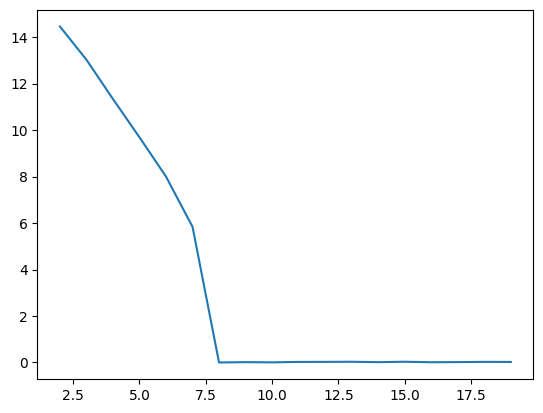

In [17]:
plt.plot(n_range, errs)

In [ ]:
import numpy as np

In [26]:
model = NMF(n_components=n, init='random', random_state=0)
tranformed = model.fit_transform(np.max(zstat_df, 0).T).shape
type(model)

ValueError: Expected 2D array, got 1D array instead:
array=[10.85759254  9.49287026 10.76424505 ...  1.22237671  1.0306457
  1.1972444 ].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.